- Name: **Abdur Rehman**
- ERP: **27041**
- Instructor: **Professor Vishal Khemani**


# **Income Classification Model**

# **Table of Contents**


1.	Introduction
    - 1.1 Importance of Implementing our model and doing statistics
    - 1.2 Objective of the project
2.	Uploading Dataset
    - 2.1 Importing packages, libraries, and warnings
    - 2.2 Data Dictionary
3.	Data Cleaning
    - 3.1 Dealing with the missing values
4.	Data Pre-Processing, EDA & Feature Engineering
    - 4.11 Income
    - 4.12 Education (Income Distribution by Education)
    - 4.13 Marital-status
    - 4.14 Occupation
    - 4.15 Gender (Income Distribution by Gender)
    - 4.16 Race (Income Distribution by Race)
    - 4.17 Native Country (Income Distribution by Native-Country)
    - 4.18 Work class (Income Distribution by Work Class)
    - 4.19 Relationship (Income Distribution by Relationship)
    - 4.21 Age (Income Distribution by Age)
    - 4.22 Educational Num (Income Distribution by Educational Num)
    - 4.23 Capital gain and Capital loss; Create a crossing feature  Capital Diff (Income Distribution by Capital Diff)
    - 4.24 Hours Per Week (Income Distribution by Hours Per Week)
5. Feature Selection Encoding
    - 5.1 Label Encoding
    - 5.2 Standard Scaling
    - 5.3 Dividing Data into training and testing dataset
    - 5.4	Class Balancing
6. Building Machine Learning Model
    - 6.1 Logistic Regression
    - 6.2 Confusion Matrix for logistic Regression Model
    - 6.3 Classification Report for logistic Regression Model
    - 6.4 K-Nearest Neighbors
    - 6.5 Confusion Matrix for K-Nearest Neighbors Model
    - 6.6 Classification Report for K-Nearest Neighbors Model


# **Introduction**

### **Importance of Implementing our model and doing statistics**

The data as I studied about it is about census which is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information enables more effective planning of services, enhances the quality of life, and helps address existing challenges.

### **Objective of the project**
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. To achieve this, the K-Nearest Neighbors technique is implemented that would yield the best prediction result.

# **Uploading Dataset**

### **Importing packages, libraries, and warnings**

In [ ]:
from google.colab import files

# pandas for Data Preprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
%matplotlib inline

# sklearn is a machine learning library that provides functions to build models
# StandardScaler is used to scale the data (important for KNN)
from sklearn.preprocessing import StandardScaler

# KNeighborsClassifier is the KNN model itself
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# train_test_split is used to split the data into training and testing sets
from sklearn.model_selection import train_test_split # used to train the model

# Accuracy and other metrics to evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# data scaling
from sklearn.preprocessing import scale, MinMaxScaler
# test data
from sklearn.metrics import accuracy_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Load the Excel file into a DataFrame
file_name = next(iter(uploaded))  # Get the uploaded file's name
df = pd.read_excel(file_name)

Saving Dataset 1.xlsx to Dataset 1 (2).xlsx


In [ ]:
# finding dimensions of dataset
df.shape

(48842, 15)

In [ ]:
# printing first few rows of dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# about data and its types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        48838 non-null  object 
 2   fnlwgt           48841 non-null  float64
 3   education        48840 non-null  object 
 4   educational-num  48841 non-null  float64
 5   marital-status   48837 non-null  object 
 6   occupation       48839 non-null  object 
 7   relationship     48839 non-null  object 
 8   race             48838 non-null  object 
 9   gender           48831 non-null  object 
 10  capital-gain     48842 non-null  int64  
 11  capital-loss     48842 non-null  int64  
 12  hours-per-week   48842 non-null  int64  
 13  native-country   48838 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [ ]:
# statistical details of data
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884100e+04,48841.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896596e+05,10.078111,1079.067626,87.502314,40.422382
std,13.710510,1.056004e+05,2.570994,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781420e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376300e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### **Data Dictionary**


1. Categorical Attributes

- workclass(Individual work category):
   
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
   - education(Individual's highest education degree):
   
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
   - marital-status(Individual marital status):
   
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
   - occupation(Individual's occupation):

Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
   - relationship(Individual's relation in a family):
   
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
   - Race(Race of Individual):
  
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
   - Gender(Individual's Gender):
   
Female, Male.
   - native-country(Individual's native country):
  
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

2. Continuous Attributes

   - age(Individual's age)
   - education-num(Individual's year of receiving education)
   - fnlwgt(Individual's final weight)
   - capital-gain
   - capital-loss
   - hours-per-week(Individual's working hour per week)


# **Data Cleaning**

In [ ]:
df.describe(include= 'object').T

,count,unique,top,freq
workclass,48838,9,Private,33902
education,48840,16,HS-grad,15784
marital-status,48837,7,Married-civ-spouse,22378
occupation,48839,15,Prof-specialty,6172
relationship,48839,6,Husband,19715
race,48838,5,White,41759
gender,48831,2,Male,32643
native-country,48838,42,United-States,43828
income,48842,2,<=50K,37155


In [ ]:
def missing_values(df):

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

,count,percentage
age,0,0.00
workclass,4,0.01
fnlwgt,1,0.00
education,2,0.00
educational-num,1,0.00
marital-status,5,0.01
occupation,3,0.01
relationship,3,0.01
race,4,0.01
gender,11,0.02


In [ ]:
# As observed, the workclass and occupation features contain "?" values. So, I replaced the values with nan
df[df == '?'] = np.nan

In [ ]:
# After replacing '?' symboll to 'nan' value, we can see the missing values now
missing_values(df)

,count,percentage
age,0,0.00
workclass,2803,5.74
fnlwgt,1,0.00
education,2,0.00
educational-num,1,0.00
marital-status,5,0.01
occupation,2812,5.76
relationship,3,0.01
race,4,0.01
gender,11,0.02


In [ ]:
df['workclass'].value_counts(normalize=True)

,proportion
workclass,
Private,0.736376
Self-emp-not-inc,0.083885
Local-gov,0.068116
State-gov,0.043029
Self-emp-inc,0.036817
Federal-gov,0.031104
Without-pay,0.000456
Never-worked,0.000217


In [ ]:
df['workclass'] = df['workclass'].fillna('Private')

In [ ]:
df['occupation'].value_counts(normalize=True)

,proportion
occupation,
Prof-specialty,0.134086
Craft-repair,0.132740
Exec-managerial,0.132218
Adm-clerical,0.121877
Sales,0.119574
Other-service,0.106952
Machine-op-inspct,0.065653
Transport-moving,0.051162
Handlers-cleaners,0.045014


In [ ]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [ ]:
df['native-country'].value_counts(normalize=True)

,proportion
native-country,
United-States,0.913445
Mexico,0.019820
Philippines,0.006148
Germany,0.004293
Puerto-Rico,0.003835
Canada,0.003793
El-Salvador,0.003230
India,0.003147
Cuba,0.002876


In [ ]:
df['native-country'].mode()[0]

'United-States'

In [ ]:
# Filling any missing values (NaN) in the native.country column with "United-States" which is the mode.
df['native-country'] = df['native-country'].fillna('United-States')

In [ ]:
df=df.dropna()

df.count()

,0
age,48817
workclass,48817
fnlwgt,48817
education,48817
educational-num,48817
marital-status,48817
occupation,48817
relationship,48817
race,48817
gender,48817


In [ ]:
#Check missing values
missing_values(df)

,count,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


# **Data Pre-Processing & Feature Engineering**

In [ ]:
print('workclass',df.workclass.unique())
print('education',df.education.unique())
print('marital-status',df['marital-status'].unique())
print('occupation',df.occupation.unique())
print('relationship',df.relationship.unique())
print('race',df.race.unique())
print('gender',df.gender.unique())
print('native-country',df['native-country'].unique())
print('income',df.income.unique())

workclass ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Doctorate' '5th-6th' 'Masters' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Tech-support'
 'Exec-managerial' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' '

In [ ]:
# Fonction for counting and normalizing values in the column

def value_cnt_fonc(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='norm_counts')

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['norm_counts']], axis=1)

    return df_result

### **1. Income**

In [ ]:
# Convert income values to binary: 0 for <=50K, 1 for >50K

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
value_cnt_fonc(df, 'income')

,income,counts,norm_counts
0,0,37133,0.760657
1,1,11684,0.239343


In [ ]:

income_less_50K = df[df['income'] == 0].shape[0]
income_over_50K = df[df['income'] == 1].shape[0]

print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

Income <= 50K (0) count: 37133
Income >  50K (1) count: 11684


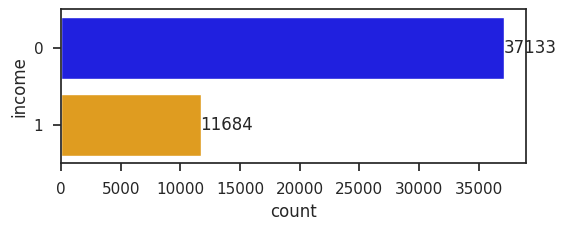

In [ ]:
fig = plt.figure(figsize=(6, 2))
sns.set_style('ticks')
ax = sns.countplot(y="income", data=df, palette=["blue", "orange"])

for p in ax.patches:
    ax.text(p.get_width() + 0.2, p.get_y() + p.get_height() / 2, int(p.get_width()), va='center')

plt.show()



### **2. Education**

In [ ]:
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [ ]:
df[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
2,Doctorate,16.000000
4,Masters,14.238750
0,Bachelors,13.000000
1,CommunityCollege,10.361954
3,HighGrad,9.000000
5,dropout,5.615493


In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,dropout,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814.0,HighGrad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951.0,CommunityCollege,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323.0,CommunityCollege,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497.0,CommunityCollege,10.0,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,CommunityCollege,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374.0,HighGrad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910.0,HighGrad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490.0,HighGrad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


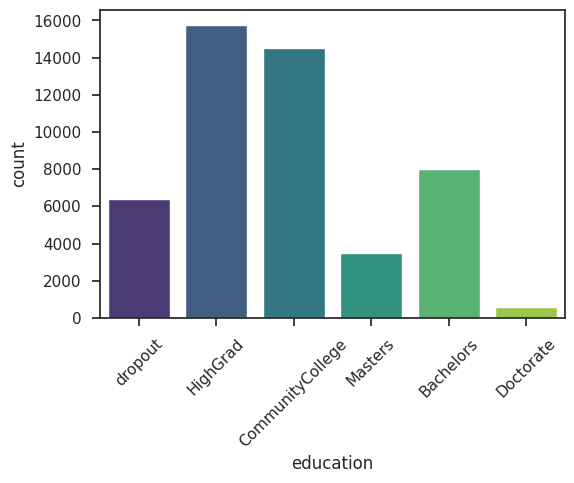

In [ ]:
fig = plt.figure(figsize=(6, 4))
sns.set_style('ticks')
sns.countplot(x="education", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.show()

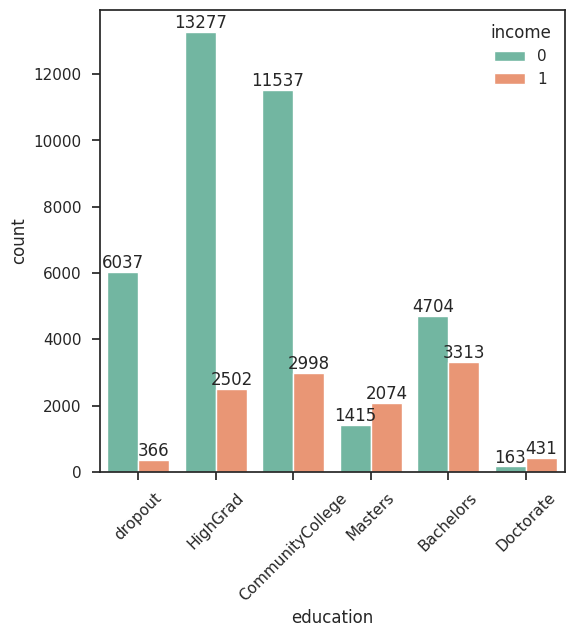

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot( data=df, x="education",hue="income", palette='Set2')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### **3. Marital Status**

In [ ]:
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

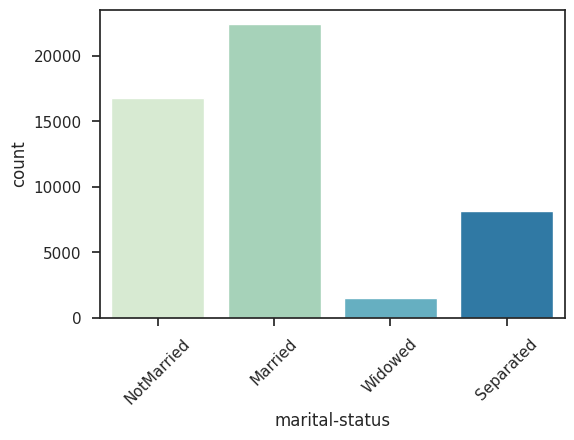

In [ ]:
fig = plt.figure(figsize=(6, 4))
sns.set_style('ticks')
sns.countplot(x="marital-status", data=df, palette="GnBu")
plt.xticks(rotation=45)
plt.show()

### **4. Occupation**

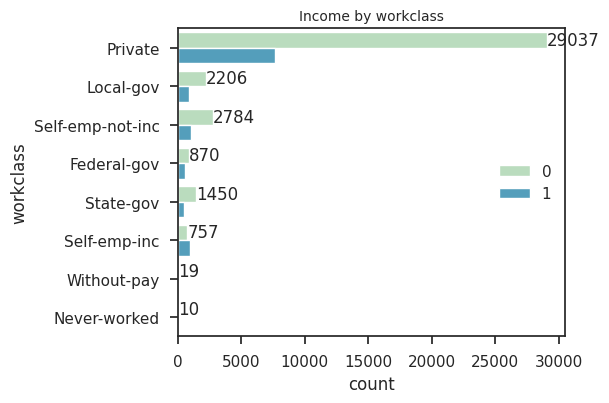

In [ ]:
plt.figure(figsize = (5,4))
ax = sns.countplot(y = df['workclass'], hue = df['income'] , palette='GnBu')
plt.title("Income by workclass", fontsize = 10)
ax.bar_label(ax.containers[0]);
ax.legend(loc='center right')

### **5. Gender**

In [ ]:
value_cnt_fonc(df, 'gender')

,gender,counts,norm_counts
0,Male,32637,0.668558
1,Female,16180,0.331442


In [ ]:
gender_count = df.groupby(['income', 'gender']).size().reset_index(name='count')

fig = px.bar(gender_count, x='income', y='count', color='income', facet_col='gender', text='count')

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(height=450, width=600)

fig.show()


### **6. Race**

In [ ]:
value_cnt_fonc(df, 'race')

,race,counts,norm_counts
0,White,41740,0.855030
1,Black,4683,0.095930
2,Asian-Pac-Islander,1519,0.031116
3,Amer-Indian-Eskimo,469,0.009607
4,Other,406,0.008317


In [ ]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Others', inplace = True)

In [ ]:
value_cnt_fonc(df, 'race')

,race,counts,norm_counts
0,White,41740,0.85503
1,Black,4683,0.09593
2,Others,2394,0.04904


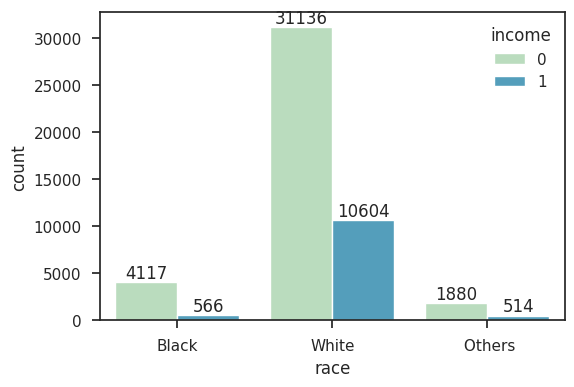

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=df, x="race",hue='income', palette='GnBu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### **7. Native Country**

In [ ]:
value_cnt_fonc(df, 'native-country')

,native-country,counts,norm_counts
0,United-States,44666,0.914968
1,Mexico,949,0.019440
2,Philippines,295,0.006043
3,Germany,206,0.004220
4,Puerto-Rico,184,0.003769
5,Canada,182,0.003728
6,El-Salvador,155,0.003175
7,India,151,0.003093
8,Cuba,138,0.002827
9,England,127,0.002602


In [ ]:
# Replaces all values in the native-country column that are not "United-States" with "Others."

df['native-country'].loc[df['native-country'] != 'United-States'] = 'Others'

In [ ]:
value_cnt_fonc(df, 'native-country')

,native-country,counts,norm_counts
0,United-States,44666,0.914968
1,Others,4151,0.085032


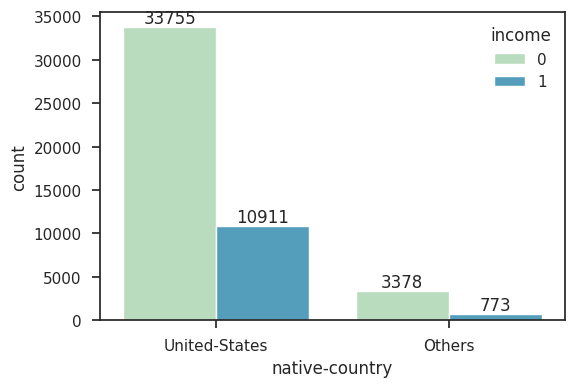

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=df, x="native-country",hue='income', palette='GnBu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### **8. Work-Class**

In [ ]:
value_cnt_fonc(df, 'workclass')

,workclass,counts,norm_counts
0,Private,36688,0.751541
1,Self-emp-not-inc,3860,0.079071
2,Local-gov,3133,0.064178
3,State-gov,1980,0.040560
4,Self-emp-inc,1694,0.034701
5,Federal-gov,1431,0.029314
6,Without-pay,21,0.000430
7,Never-worked,10,0.000205


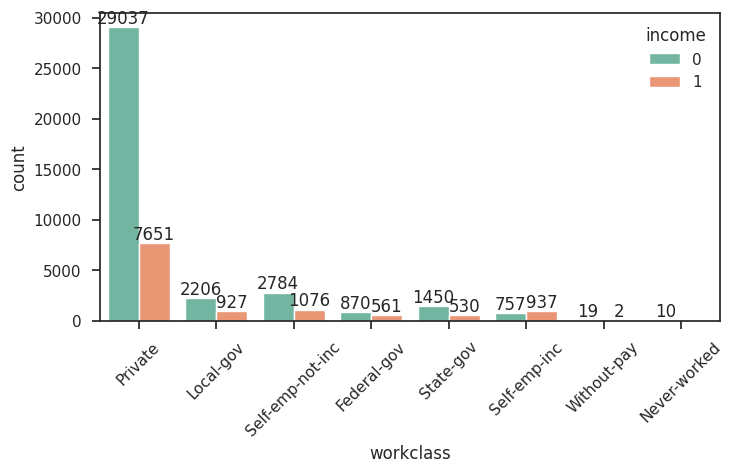

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot( data=df, x="workclass",hue='income', palette='Set2')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### **9. Relationship**

In [ ]:
value_cnt_fonc(df, 'relationship')

,relationship,counts,norm_counts
0,Husband,19711,0.403773
1,Not-in-family,12572,0.257533
2,Own-child,7578,0.155233
3,Unmarried,5122,0.104922
4,Wife,2330,0.047729
5,Other-relative,1504,0.030809


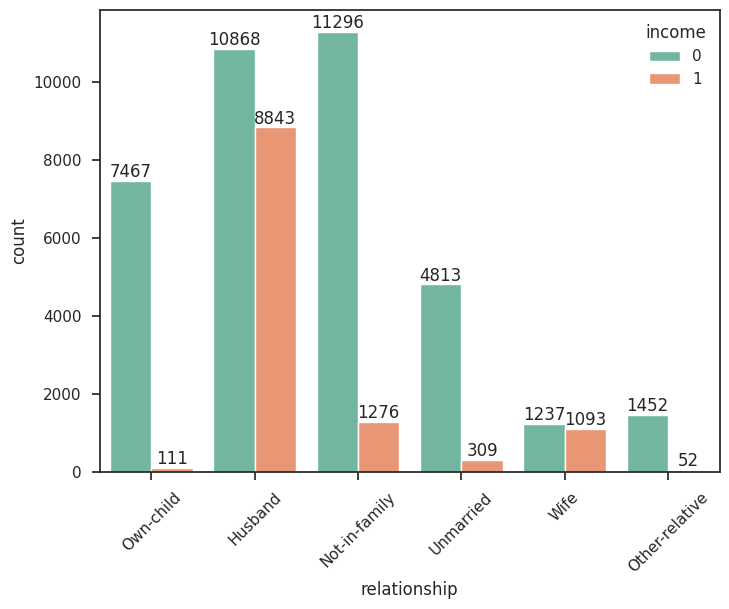

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot( data=df, x="relationship",hue='income', palette='Set2')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [ ]:
# Looking for Duplicate Rows
duplicate_rows_df=df[df.duplicated()]
print("No. of Duplicate rows", duplicate_rows_df.shape)
df.duplicated().sum()

No. of Duplicate rows (57, 15)


57

In [ ]:
df.shape

(48817, 15)

In [ ]:
df = df.drop_duplicates()
df.shape

(48760, 15)

In [ ]:
# Categorcal and Numerecal Features

cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include=['int64','float64']).columns

print('Categoricals:', list(cat_features))
print('---------------------------')
print('Numericals:',list(num_features))

Categoricals: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
---------------------------
Numericals: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


In [ ]:
list(cat_features)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

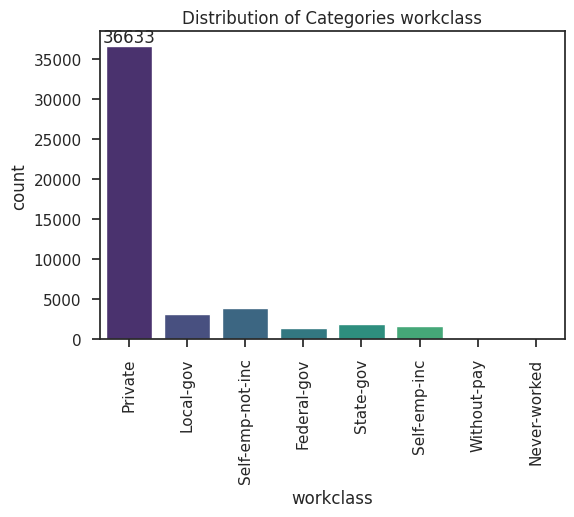

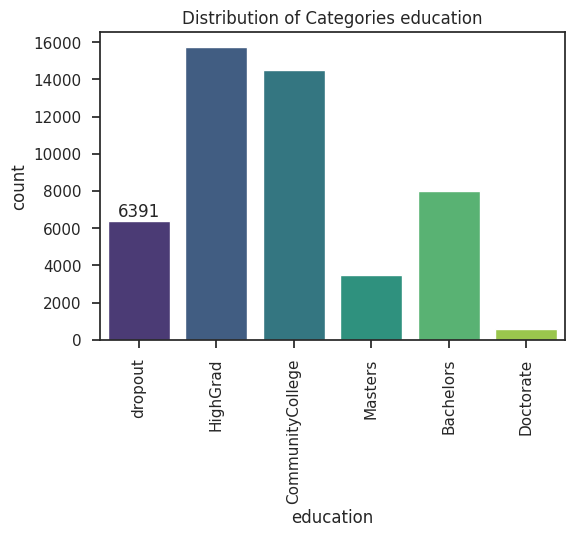

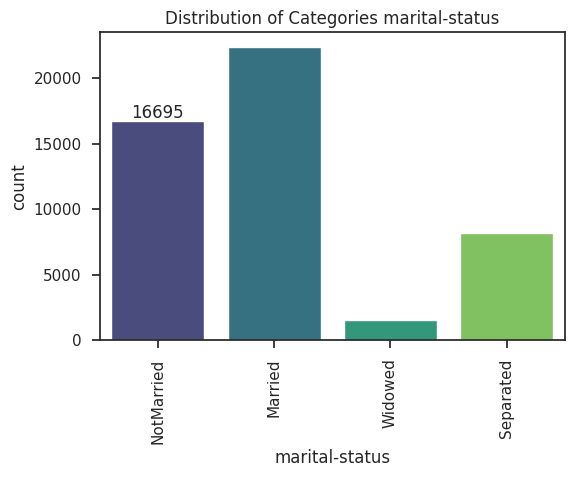

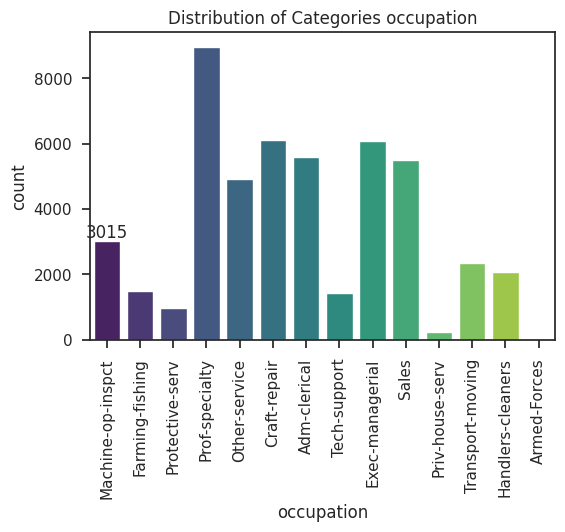

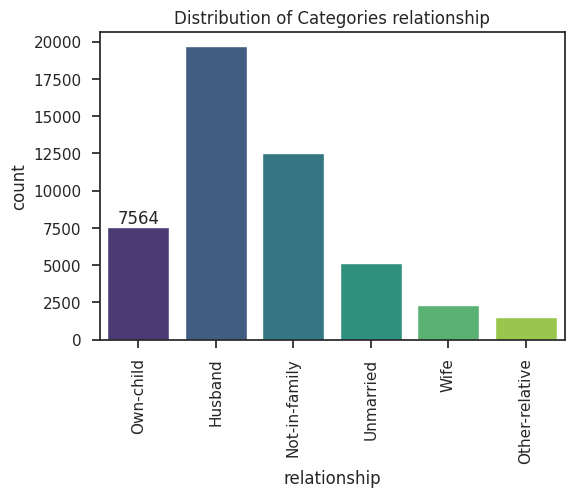

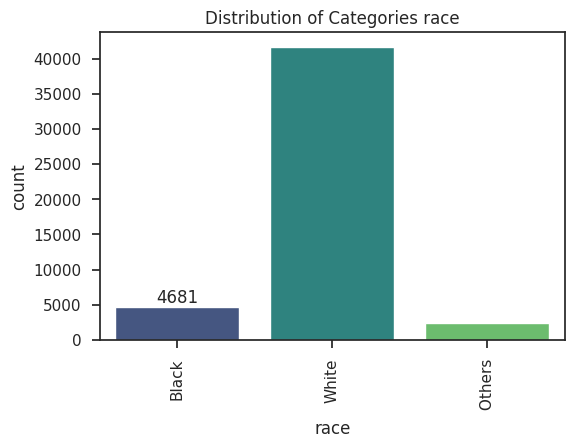

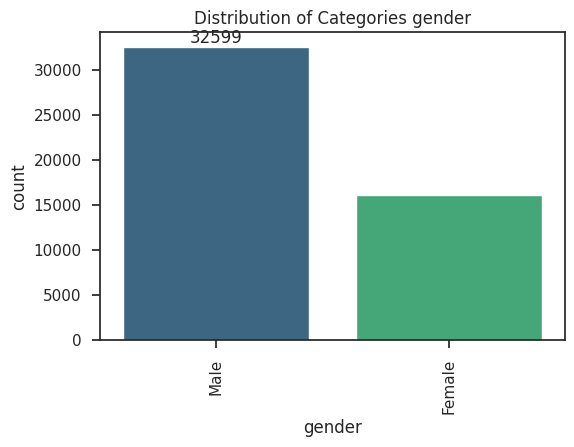

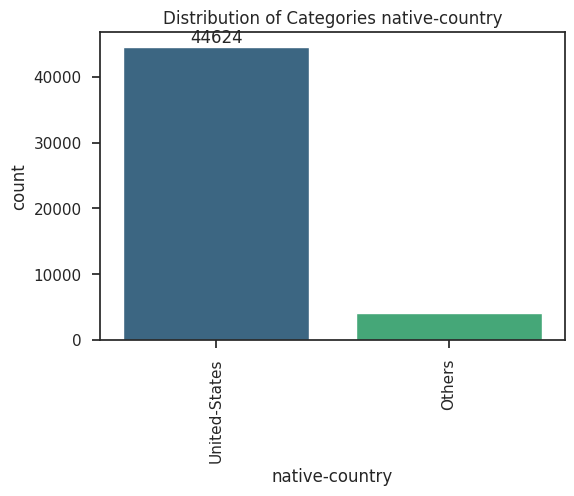

In [ ]:
# DISTRIBUTIONS OF CATEGORICAL FEATURES;

for column in cat_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

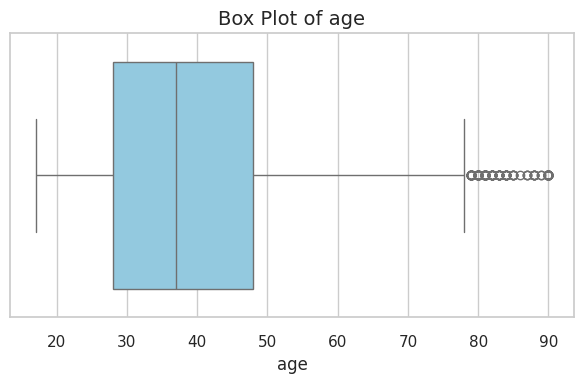

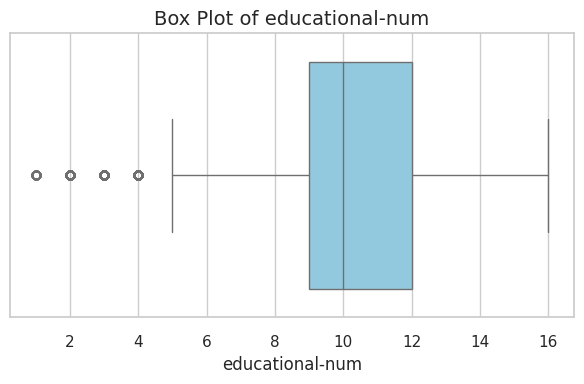

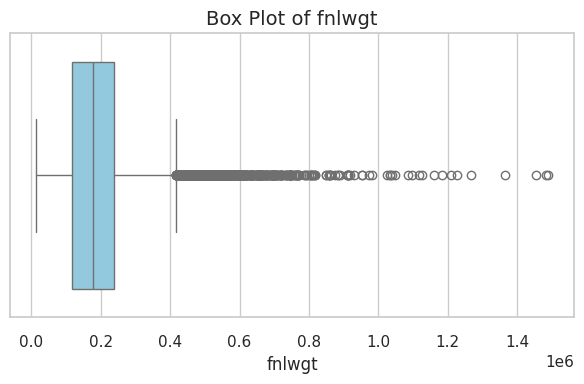

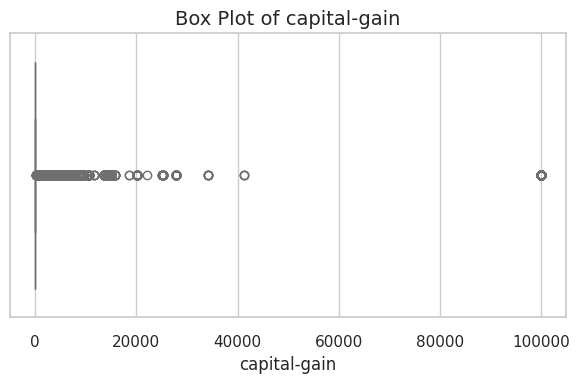

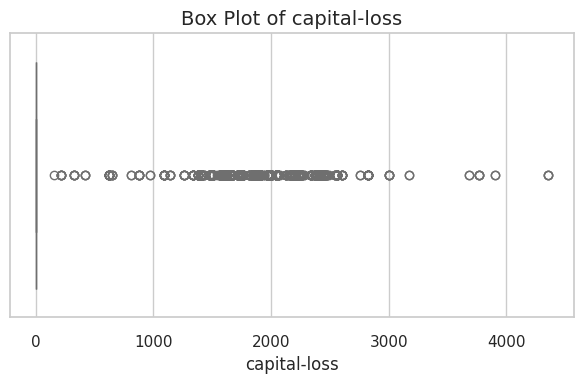

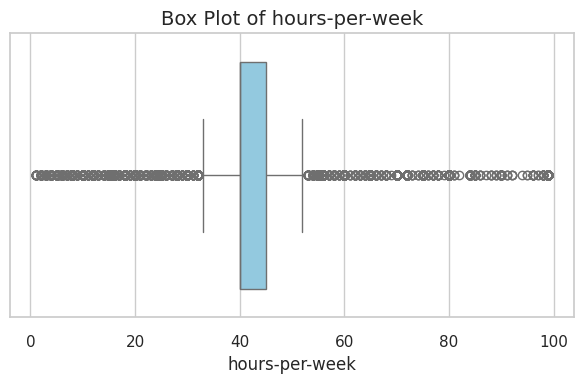

In [ ]:
sns.set_palette("deep")  # setting  pallete
sns.set(style="whitegrid")  # Set the style of the grid

# List of columns to plot
continous_col = ['age',  'educational-num', 'fnlwgt',
       'capital-gain', 'capital-loss',  'hours-per-week']

# Loop through each column and create a box plot
for i in continous_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[i], color="skyblue")  # Adjust color here as needed
    plt.title(f'Box Plot of {i}', fontsize=14)  # Add title with larger font
    plt.xlabel(i, fontsize=12)  # Add x-axis label
    plt.tight_layout()  # Ensure layout is neat
    plt.show()

In [ ]:
Q1 = df[['age', 'educational-num',  'hours-per-week']].quantile(0.25) # lower quartile
Q3 = df[['age', 'educational-num',  'hours-per-week']].quantile(0.75) # upper quartile
IQR = Q3 - Q1

# Remove rows with outliers based on IQR
df= df[~((df[['age', 'educational-num',  'hours-per-week']] < (Q1 - 1.5 * IQR)) |
                  (df[['age', 'educational-num',  'hours-per-week']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df.shape

(33949, 15)

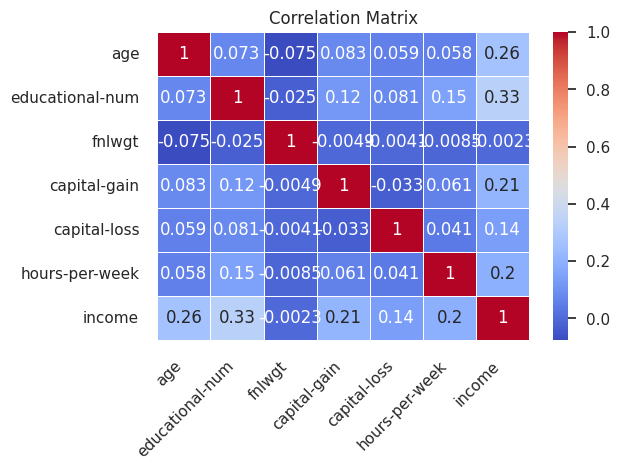

In [ ]:
continous_col = ['age', 'educational-num', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

plt.figure(figsize=(6, 4))
sns.heatmap(df[continous_col].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

The correlation Matrix shows that there isn’t high multi-collinearity between features.

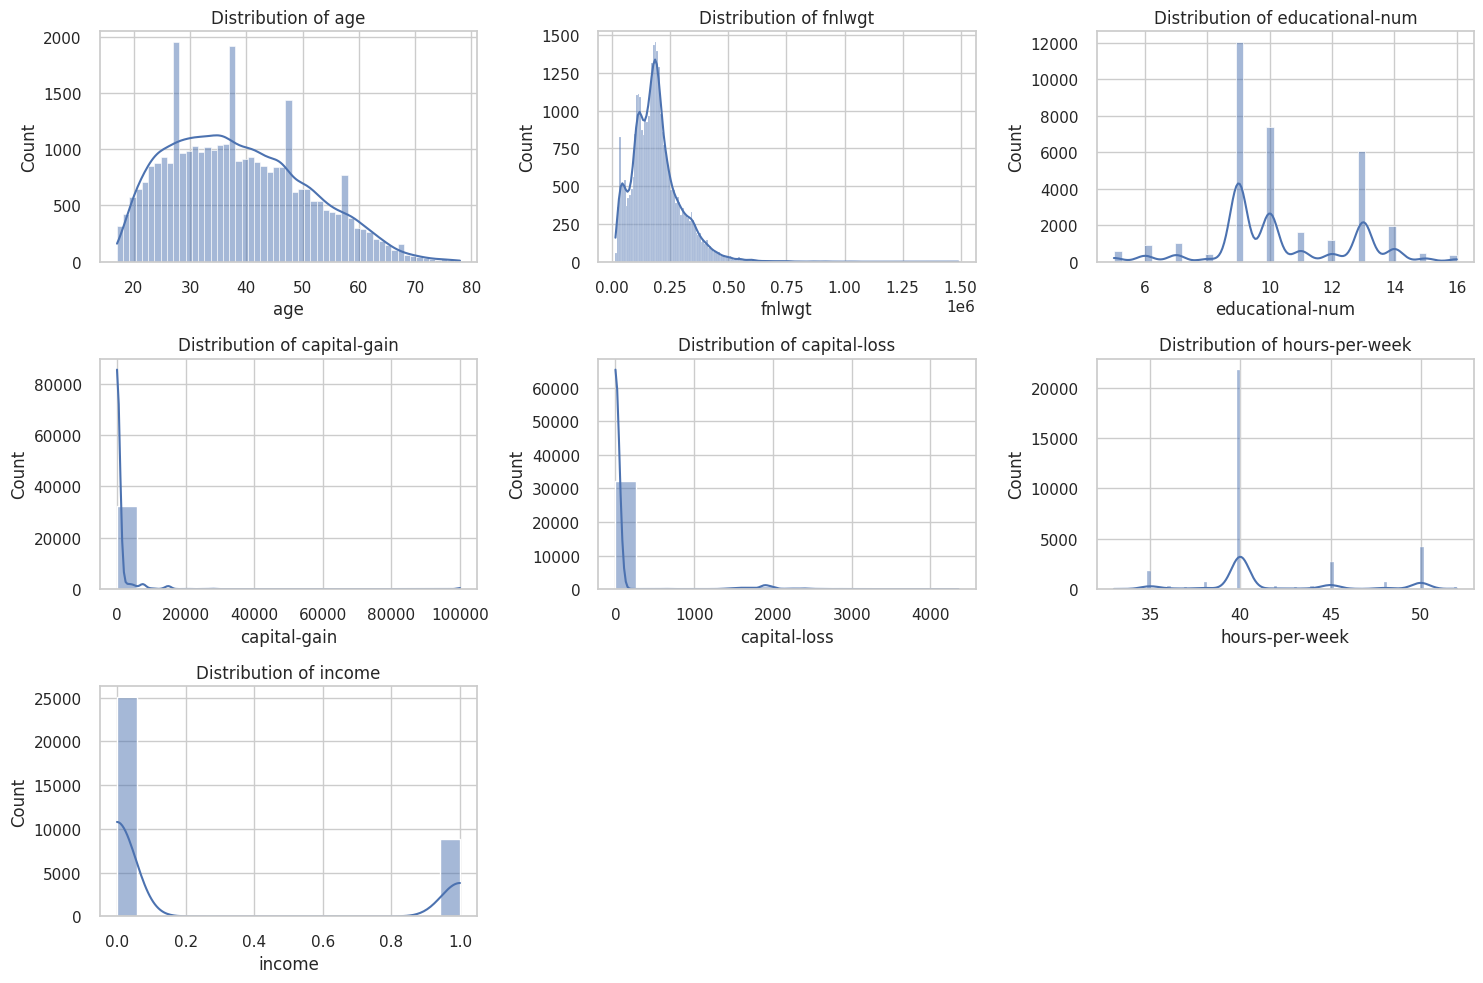

In [ ]:
# DISTRIBUTIONS OF NUMERICAL FEATURES;

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15,10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

- Age Distribution: The age distribution is right-skewed, with most individuals clustered between 20 and 50 years old, gradually decreasing as age increases.
- Fnlwgt Distribution: The fnlwgt (final weight) feature shows a right-skewed distribution, indicating that most individuals have a lower final weight.
- Education.num: The distribution of education levels is multimodal, with significant peaks around levels 9 (high school graduate) and 10 (some college education).
- Capital Gain and Loss: Both capital.gain (profit from the sale of assets) and capital.loss (loss from the sale of assets) are highly right-skewed, with most individuals reporting values close to zero and only a few reporting substantial gains or losses.
- Hours per Week: The majority of individuals work around 40 hours per week, with a sharp peak at this value, indicating a standard workweek.
- Income: The income distribution shows that most individuals earn less than or equal to 50K (indicated by 0), with fewer individuals earning more than 50K (indicated by 1).

These insights highlight the skewed nature of certain features, particularly capital.gain and capital.loss, which may require special consideration during analysis or modeling.

### **1. Age**

In [ ]:

fig = px.histogram(df, x='age', color="income", barmode='group', title='Income Distribution by Age')
fig.update_layout(height=450, width=600)


### **2. Educational Num**

In [ ]:
# Number of years of education completed by the individuals

value_cnt_fonc(df, 'educational-num')

,educational-num,counts,norm_counts
0,9.0,12013,0.353854
1,10.0,7388,0.217621
2,13.0,6053,0.178297
3,14.0,1943,0.057233
4,11.0,1631,0.048043
5,12.0,1176,0.034640
6,7.0,1011,0.029780
7,6.0,900,0.026510
8,5.0,566,0.016672
9,15.0,494,0.014551


In [ ]:
# Number of years of education completed by the individuals

fig = px.histogram(df, x='educational-num', color="income", barmode='group', title='Income Distribution by Education Num')
fig.update_layout(height=450, width=600)


### **3&4: Capital gain and Capital loss**

1. Capital Gain and Loss Columns
   - Createing a new feature capital_diff by calculating the difference between capital.loss(which represents profit from the sale of an asset) and capital.gain (which represents a loss from the sale of an asset).
   - The difference is then categorized into 'Low' and 'High' based on specified bins, converted into a categorical object type, and the original capital.gain and capital.loss columns are dropped from the dataset.
   - Values between -5000 and 5000 are assigned to the 'Low' category, while values between 5000 and 100000 are assigned to the 'High' category.
   - The goal is to simplify the dataframe by combining the information from the capital.gain and capital.loss columns into a single categorical column and to categorize whether the total gain/loss obtained from these two columns is low or high.

2. Note:
   - Capital Gain: The profit earned when an asset is sold for more than its purchase price.
   - Capital Loss: The loss incurred when an asset is sold for less than its purchase price.
   - So, the difference between the two gives the net effect—whether ended up with an overall profit or loss from the transactions.

In [ ]:
value_cnt_fonc(df, 'capital-gain')

,capital-gain,counts,norm_counts
0,0,31062,0.914961
1,15024,361,0.010634
2,7688,325,0.009573
3,7298,292,0.008601
4,99999,142,0.004183
...,...,...,...
105,6767,1,0.000029
106,6612,1,0.000029
107,2062,1,0.000029
108,5060,1,0.000029


In [ ]:
value_cnt_fonc(df, 'capital-loss')

,capital-loss,counts,norm_counts
0,0,32303,0.951516
1,1902,233,0.006863
2,1887,191,0.005626
3,1977,168,0.004949
4,1485,59,0.001738
...,...,...,...
86,1539,1,0.000029
87,2352,1,0.000029
88,1510,1,0.000029
89,1816,1,0.000029


In [ ]:
df['capital_diff'] = df['capital-gain'] - df['capital-loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital-gain'], axis = 1, inplace = True)
df.drop(['capital-loss'], axis = 1, inplace = True)
value_cnt_fonc(df, 'capital_diff')

,capital_diff,counts,norm_counts
0,Low,32151,0.947038
1,High,1798,0.052962


In [ ]:
fig = px.histogram(df, x='capital_diff', color="income", barmode='group', title='Income Distribution by Capital Diff')
fig.update_layout(height=450, width=600)

### **Hours Per Week**

In [ ]:
value_cnt_fonc(df, 'hours-per-week')

,hours-per-week,counts,norm_counts
0,40,21800,0.642140
1,50,4148,0.122183
2,45,2647,0.077970
3,35,1838,0.054140
4,48,734,0.021621
5,38,692,0.020384
6,42,333,0.009809
7,36,315,0.009279
8,44,300,0.008837
9,37,236,0.006952


In [ ]:
fig = px.histogram(df, x='hours-per-week', color="income", barmode='group', title='Income Distribution by Hours per Week')
fig.update_layout(height=450, width=600)

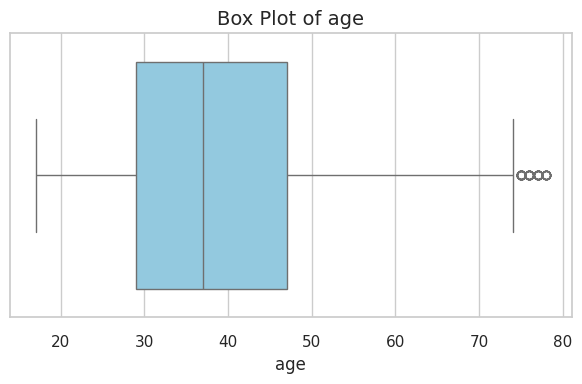

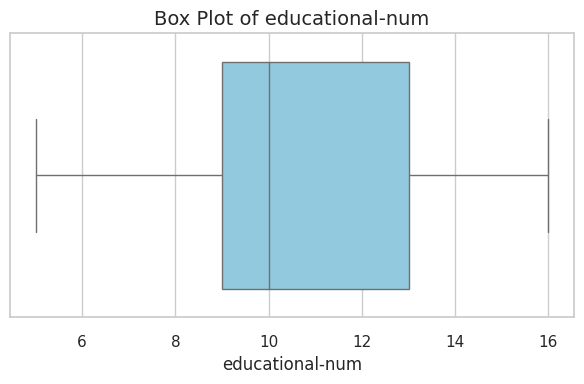

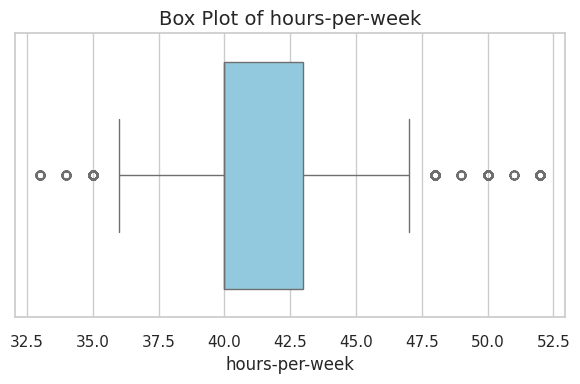

In [ ]:
sns.set_palette("BuPu")  # setting  pallete
sns.set(style="whitegrid")  # Set the style of the grid

# List of columns to plot
continous_col = ['age',  'educational-num', 'hours-per-week']

# Loop through each column and create a box plot
for i in continous_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[i], color="skyblue")  # Adjust color here as needed
    plt.title(f'Box Plot of {i}', fontsize=14)  # Add title with larger font
    plt.xlabel(i, fontsize=12)  # Add x-axis label
    plt.tight_layout()  # Ensure layout is neat
    plt.show()

In [ ]:
df.shape

(33949, 14)

In [ ]:
# Check Multicolinarty between features

def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

df.select_dtypes("number").corr().style.map(color_custom)

,age,fnlwgt,educational-num,hours-per-week,income
age,1.000000,-0.075297,0.072795,0.057856,0.262575
fnlwgt,-0.075297,1.000000,-0.025082,-0.008544,-0.002272
educational-num,0.072795,-0.025082,1.000000,0.149690,0.329229
hours-per-week,0.057856,-0.008544,0.149690,1.000000,0.196620
income,0.262575,-0.002272,0.329229,0.196620,1.000000


### **Correlation:**

   - The income feature has the highest positive correlation with education.num (0.335), indicating that higher education levels are moderately associated with higher income.
   - Other features like age, and hours.per.week also show a positive but weaker correlation with income.
   - Most features exhibit low correlation with each other, which suggests that multicollinearity is not a significant concern in this dataset.

Overall, the heatmap suggests that while some features like education.num is relevant to predicting income, multicollinearity is not a major issue in this dataset, making it easier to build a robust predictive model.

### **Outlier Analysis**

- In this study, Logistic Regression and KNN models will be used.
- Outliers can significantly impact model performance, particularly for models like Logistic Regression, SVM, and KNN, which are sensitive to the scale and distribution of the data.
- Outliers may skew results and reduce model accuracy.
- Decision Trees, on the other hand, are generally more robust to outliers but still may lead to overfitting if not managed.
- Therefore, careful handling of outliers, such as using scaling or transformation techniques, is important to ensure reliable model performance.
- Additionally, outliers handled during the analysis to ensure a more accurate representation of the data and to enhance model performance.

### **Outlier Summary**

- Age: Individuals with higher income (1) tend to be slightly older on average compared to those with lower income (0), although the age ranges overlap significantly.
- Education: There is a clear distinction in education levels (education.num) between the two income groups. Higher income earners tend to have significantly more years of education.
- Hours per Week: Higher income earners (1) work more hours per week on average, with a wider range of working hours. Lower income earners (0) are concentrated around 40 hours per week, with fewer variations.
- These insights suggest that age, education, and hours worked per week are all factors that differentiate income levels.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33949 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              33949 non-null  int64  
 1   workclass        33949 non-null  object 
 2   fnlwgt           33949 non-null  float64
 3   education        33949 non-null  object 
 4   educational-num  33949 non-null  float64
 5   marital-status   33949 non-null  object 
 6   occupation       33949 non-null  object 
 7   relationship     33949 non-null  object 
 8   race             33949 non-null  object 
 9   gender           33949 non-null  object 
 10  hours-per-week   33949 non-null  int64  
 11  native-country   33949 non-null  object 
 12  income           33949 non-null  int64  
 13  capital_diff     33949 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 3.9+ MB


# **Feature Encoding**

In [ ]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [ ]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital_diff
0,8,3,14665,5,2,1,6,3,1,1,7,1,0,1
1,21,3,3066,3,4,0,4,0,2,1,17,1,0,1
2,11,1,19149,1,7,0,10,0,2,1,7,1,1,1
3,27,3,8347,1,5,0,6,0,1,1,7,1,1,0
6,12,3,14686,3,4,1,9,4,1,1,7,1,0,1


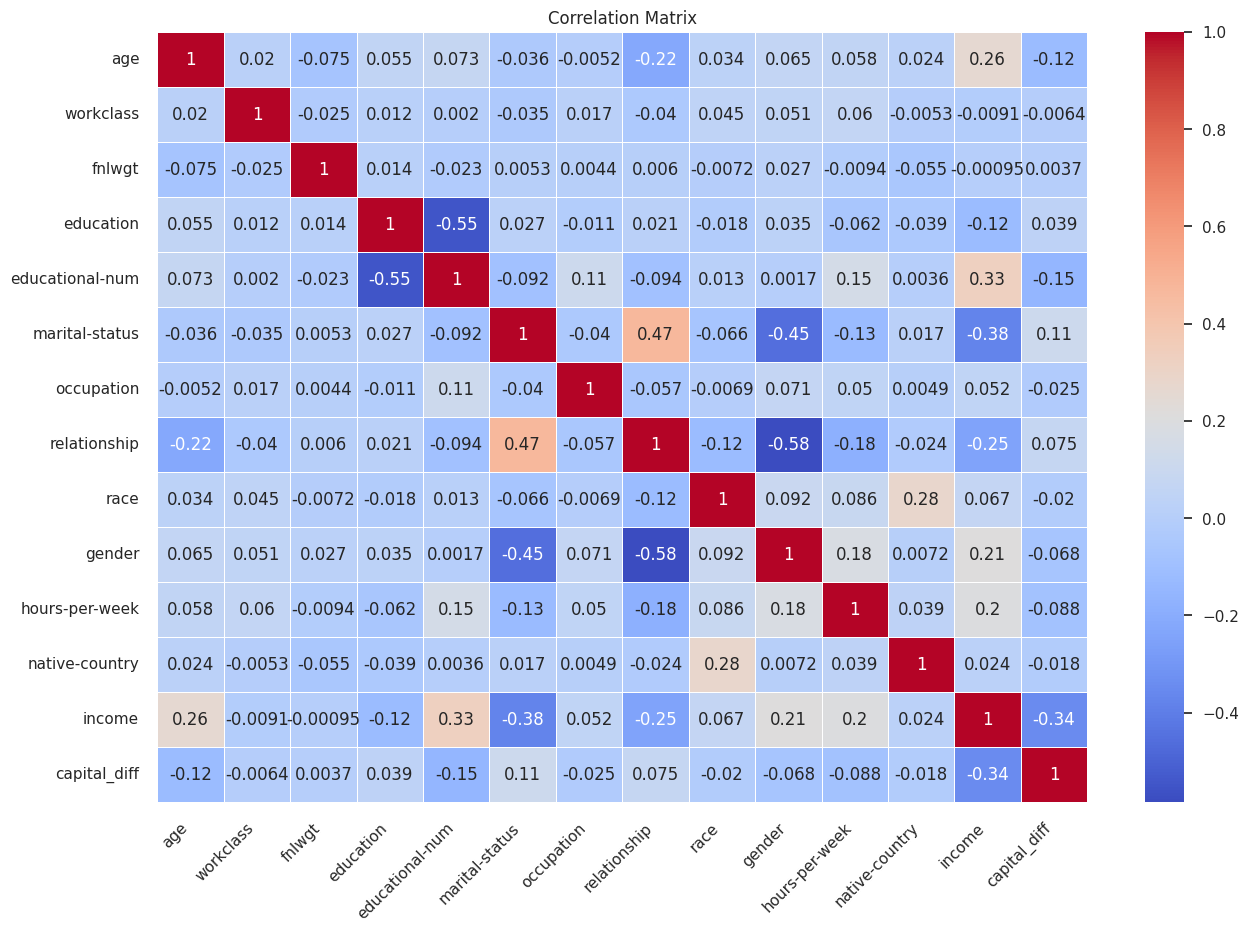

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Logistic Regression**

In [ ]:
# separating income from other variables to set up regression.
X = df.drop('income', axis = 1)
X = X.values
y = df['income']

In [ ]:
# standard scaling
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
# dividing data into train and test data with test size 30% with random_state keeping results consistent everytime  code is run
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 42)

In [ ]:
# class balancing
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
# checking dimensions of train/test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35088, 13)
(35088,)
(10185, 13)
(10185,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
log_reg = LogisticRegression()

# Train the model on training data
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)

print(y_pred)
print(y_pred.shape)

[0 0 0 ... 0 1 1]
(10185,)


In [ ]:
#probablities
probablities = log_reg.predict_proba(X_test)

for i in range(len(y_test)):
    print(probablities[i], '-->', y_pred[i])

Streaming output truncated to the last 5000 lines.
[0.91410852 0.08589148] --> 0
[0.71255334 0.28744666] --> 0
[0.10916989 0.89083011] --> 1
[0.17765345 0.82234655] --> 1
[0.32675953 0.67324047] --> 1
[0.87497806 0.12502194] --> 0
[0.90723403 0.09276597] --> 0
[0.29573947 0.70426053] --> 1
[0.87970001 0.12029999] --> 0
[0.92097178 0.07902822] --> 0
[0.9630615 0.0369385] --> 0
[0.8793425 0.1206575] --> 0
[0.53299607 0.46700393] --> 0
[0.5637512 0.4362488] --> 0
[0.94091452 0.05908548] --> 0
[0.7137268 0.2862732] --> 0
[0.06103894 0.93896106] --> 1
[0.9293704 0.0706296] --> 0
[0.26323523 0.73676477] --> 1
[0.4690546 0.5309454] --> 1
[0.80592448 0.19407552] --> 0
[0.26557058 0.73442942] --> 1
[0.75333038 0.24666962] --> 0
[0.47991768 0.52008232] --> 1
[0.67918761 0.32081239] --> 0
[0.8335159 0.1664841] --> 0
[0.18582848 0.81417152] --> 1
[0.7292522 0.2707478] --> 0
[0.79710475 0.20289525] --> 0
[0.26667708 0.73332292] --> 1
[0.58852102 0.41147898] --> 0
[0.88587957 0.11412043] --> 0
[0.14

0.7945017182130584

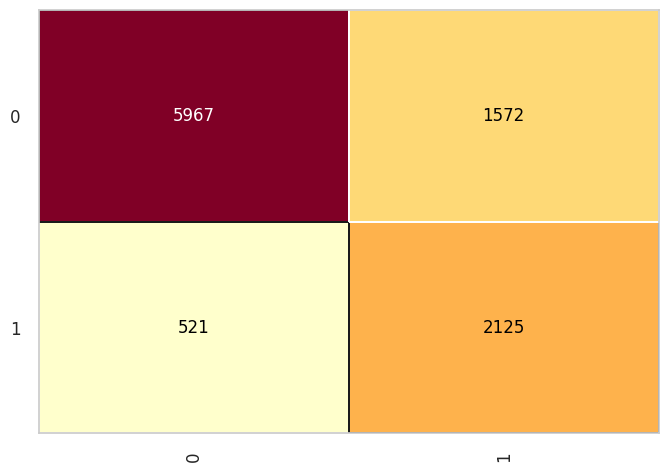

In [ ]:
# confusion matrix
cm = ConfusionMatrix(log_reg)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
logistic_normal = (classification_report(y_test, y_pred))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      7539
           1       0.57      0.80      0.67      2646

    accuracy                           0.79     10185
   macro avg       0.75      0.80      0.76     10185
weighted avg       0.83      0.79      0.80     10185



In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7945017182130584


# **K-Nearest Neighbours**

In [ ]:
# Step 1: Importing the necessary libraries for the KNN model

# pandas is used to handle data in a tabular format (like Excel)
import pandas as pd

# sklearn is a machine learning library that provides functions to build models
# StandardScaler is used to scale the data (important for KNN)
from sklearn.preprocessing import StandardScaler

# KNeighborsClassifier is the KNN model itself
from sklearn.neighbors import KNeighborsClassifier

# train_test_split is used to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Accuracy and other metrics to evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital_diff
count,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000,33949.000000
mean,21.560223,3.033226,10383.275914,2.095467,5.361955,0.751922,5.888657,1.374886,1.798669,0.685028,8.594421,0.925270,0.261156,0.947038
std,12.118164,1.133804,6005.400699,1.552502,2.199759,0.830637,4.041871,1.598627,0.508642,0.464512,4.033282,0.262959,0.439271,0.223961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,5276.000000,1.000000,4.000000,0.000000,2.000000,0.000000,2.000000,0.000000,7.000000,1.000000,0.000000,1.000000
50%,20.000000,3.000000,10264.000000,3.000000,5.000000,1.000000,6.000000,1.000000,2.000000,1.000000,7.000000,1.000000,0.000000,1.000000
75%,30.000000,3.000000,15356.000000,3.000000,8.000000,1.000000,9.000000,3.000000,2.000000,1.000000,10.000000,1.000000,1.000000,1.000000
max,61.000000,7.000000,21486.000000,5.000000,11.000000,3.000000,13.000000,5.000000,2.000000,1.000000,19.000000,1.000000,1.000000,1.000000


In [ ]:
# Step 4: Split the dataset into training and testing sets
# 70% of the data will be used for training, and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the sizes of the training and test sets
print(f'Training set size: {X_train.shape[0]} rows')
print(f'Test set size: {X_test.shape[0]} rows')


Training set size: 23764 rows
Test set size: 10185 rows


In [ ]:
# Step 5: Standardize the features
# KNN works better when the data is scaled, as it is a distance-based algorithm
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (use the same scaler fitted on training data)
X_test_scaled = scaler.transform(X_test)


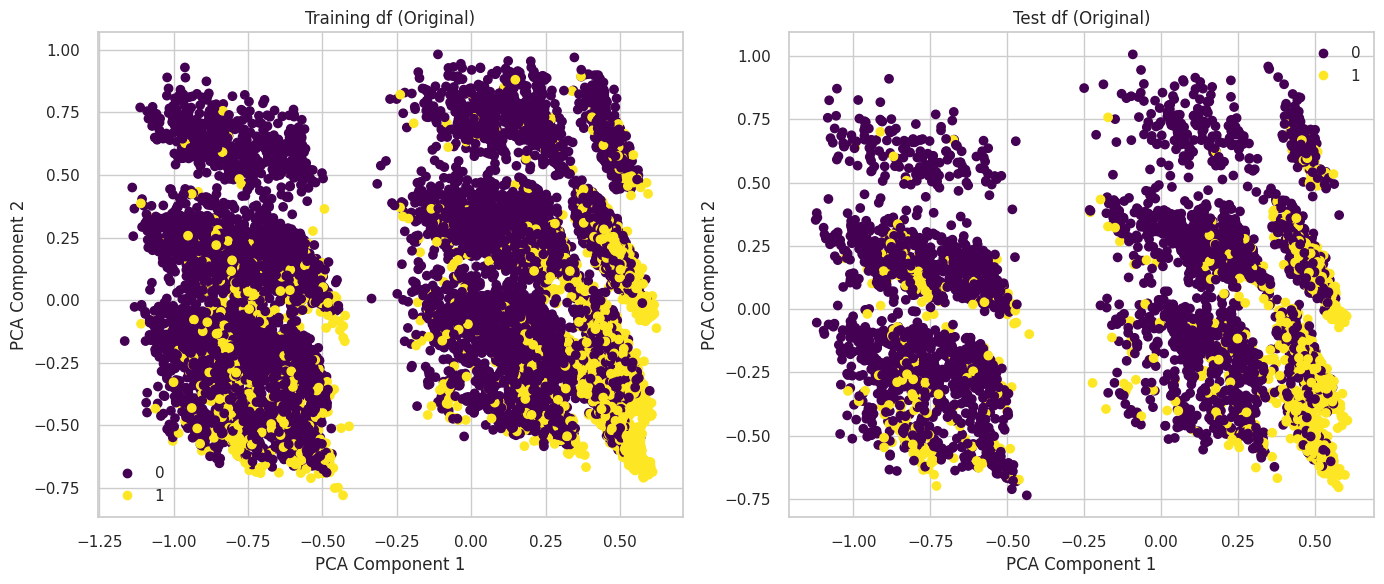

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming `df` is your dfFrame
X = df.drop(columns=["income"])  # All columns except income
y = df["income"]  # Target variable

# Split the df (assuming train-test split is needed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the df
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 2: Plot the PCA-transformed df
plt.figure(figsize=(14, 6))

# Training df (Original with PCA)
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                       c=y_train, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Training df (Original)')
plt.legend(handles=scatter1.legend_elements()[0], labels=['0', '1'])

# Test df (Original with PCA)
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                       c=y_test, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Test df (Original)')
plt.legend(handles=scatter2.legend_elements()[0], labels=['0', '1'])

plt.tight_layout()
plt.show()


In [ ]:
# Step 6: Initialize and train the KNN model
# We set n_neighbors to 5 (this is the number of nearest neighbors the model looks at)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train_scaled, y_train)

# Display a message indicating that the model has been trained
print('KNN model trained successfully!')


KNN model trained successfully!


In [ ]:
# Step 7: Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Display the first 10 predictions
print('First 10 predictions:', y_pred[:10])


First 10 predictions: [0 0 0 0 0 0 0 0 0 1]


In [ ]:
# Step 8: Evaluate the performance of the model
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the confusion matrix to see where the model made correct and incorrect predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Display the classification report to see precision, recall, and f1-score for each category
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 82.02%
Confusion Matrix:
[[4471  510]
 [ 711 1098]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4981
           1       0.68      0.61      0.64      1809

    accuracy                           0.82      6790
   macro avg       0.77      0.75      0.76      6790
weighted avg       0.81      0.82      0.82      6790



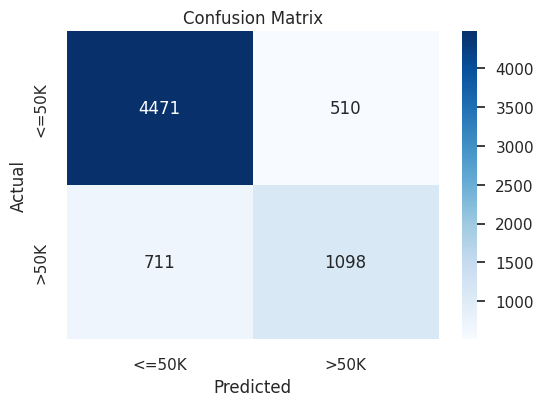


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      4981
        >50K       0.68      0.61      0.64      1809

    accuracy                           0.82      6790
   macro avg       0.77      0.75      0.76      6790
weighted avg       0.81      0.82      0.82      6790



In [ ]:
# Step 17: Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Displaying the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))


In [ ]:
# Train the KNN model with different values of 'k'
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with k={k}: {accuracy * 100:.2f}%')


Accuracy with k=3: 81.24%
Accuracy with k=5: 82.02%
Accuracy with k=7: 82.11%
Accuracy with k=9: 82.18%


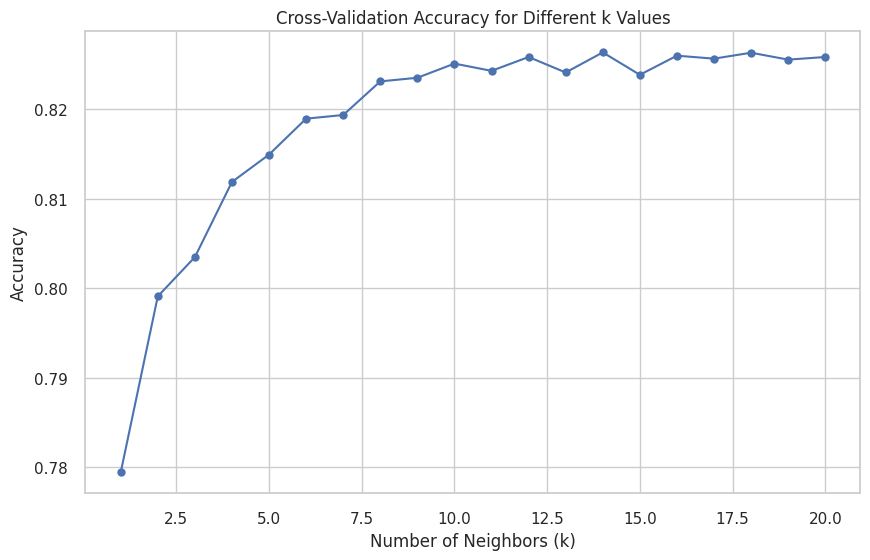

The best value for k is: 14


In [ ]:
# Step 1: Import necessary libraries for cross-validation
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Step 2: Set up a range of k values to try
k_values = range(1, 21)  # Try k from 1 to 20
cv_scores = []  # To store cross-validation scores for each k

# Step 3: Loop through the different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Step 4: Use 5-fold cross-validation to evaluate the model
    # cv=5 means we'll split the data into 5 parts and use 4 for training, 1 for testing, repeated 5 times
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Save the average accuracy for this k
    cv_scores.append(scores.mean())

# Step 5: Plot the results to visualize the best k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Step 6: Find the best value for k
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f'The best value for k is: {best_k}')


# **THE END**